## Sistema de Análisis de Sentimientos con LSTM y Word2Vec para Clasificación de Reseñas

### Introducción
Este proyecto implementa un modelo de Deep Learning para clasificar reseñas de hoteles como positivas o negativas. Utiliza una red neuronal con capas LSTM bidireccionales y embeddings preentrenados de Word2Vec, junto con técnicas de procesamiento de lenguaje natural (NLTK) y optimización de dependencias.

### Temario del Proyecto: Sistema de Clasificación de Sentimientos con LSTM

#### 1. Configuración Inicial y Dependencias

- Instalación de bibliotecas clave: `numpy`, `tensorflow`, `gensim`, entre otras.
- Resolución de conflictos de versiones y optimización del entorno de trabajo.

#### 2. Carga y Exploración de Datos

- Obtención del dataset desde GitHub (1,600 reseñas de hoteles).
- Análisis inicial:
  - Distribución de polaridad (positivo / negativo).
  - Longitud de los textos.

#### 3. Preprocesamiento de Texto

- Limpieza de texto:
  - Conversión a minúsculas.
  - Eliminación de símbolos y *stopwords*.
- Tokenización y lematización:
  - Reducción de palabras a su raíz verbal.

#### 4. Tokenización y Secuenciación

- Conversión del texto en secuencias numéricas.
- Aplicación de *padding* para estandarizar la longitud de las entradas (500 tokens).

#### 5. Embeddings Preentrenados (Word2Vec)

- Carga del modelo preentrenado **`word2vec-google-news-300`** (vectores de 300 dimensiones).
- Construcción de la matriz de embeddings para las palabras del vocabulario.

#### 6. Arquitectura del Modelo

- Capa de `Embedding` fija (no entrenable) con vectores Word2Vec.
- Capa **Bidireccional LSTM** (256 unidades) con `Dropout` para evitar sobreajuste.
- Capa de salida con activación sigmoide para clasificación binaria (positivo / negativo).

#### 7. Entrenamiento

- División de los datos:
  - 80% para entrenamiento.
  - 20% para prueba.
- Uso de **Early Stopping** para detener el entrenamiento si no mejora la pérdida de validación.

#### 8. Evaluación y Resultados

- Reporte de clasificación:
  - Precisión, *recall* y F1-score.
- Matriz de confusión.
- Precisión final alcanzada: **92%**.


### 1. Instalación de Dependencias

In [ ]:
#!pip install numpy==1.23.5 tensorflow==2.11.0 gensim nltk scipy pandas matplotlib seaborn scikit-learn

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [ ]:
%pip uninstall -y jax jaxlib

Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1


In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.16 requires jax>=0.5.0, which is not installed.
chex 0.1.89 requires jax>=0.4.27, which is not installed.
chex 0.1.89 requires jaxlib>=0.4.27, which is not installed.
optax 0.2.5 requires

In [ ]:
#!pip install --upgrade --force-reinstall numpy==1.24.4 pandas scikit-learn

### 2.  Imports y Configuración Inicial

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibilidad
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Descargas de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### 3.  Carga de Datos
Este fragmento descarga un conjunto de datos de opiniones desde GitHub, selecciona solo dos columnas (Review y Reviewer_Score), las renombra a text y polarity, y rellena los valores faltantes propagando la última observación válida.



In [ ]:
URL = (
    "https://raw.githubusercontent.com/AnIsAsPe/LogisticRegression_SpamOpinion/master/Datos/deceptive-opinion.csv"
)

df = pd.read_csv(
    URL,
    encoding='unicode_escape',
    usecols =[2,4]
).rename(columns={
    'Review': 'text',
    'Reviewer_Score': 'polarity'
})

df = df.fillna( method='ffill', axis=0)  # copia en los NaN la última observación válida, hasta encontrar la siguiente.
# df.head()

print("Shape:", df.shape)
df.head()

Shape: (1600, 2)


/tmp/ipython-input-2-566769426.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna( method='ffill', axis=0)  # copia en los NaN la última observación válida, hasta encontrar la siguiente.


,polarity,text
0,positive,We stayed for a one night getaway with family ...
1,positive,Triple A rate with upgrade to view room was le...
2,positive,This comes a little late as I'm finally catchi...
3,positive,The Omni Chicago really delivers on all fronts...
4,positive,I asked for a high floor away from the elevato...


### 4.  Exploración Rápida
Este bloque analiza el conjunto de datos mostrando el tipo de variables, la distribución de clases (polarity) y la distribución de la longitud de las reseñas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  1600 non-null   object
 1   text      1600 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


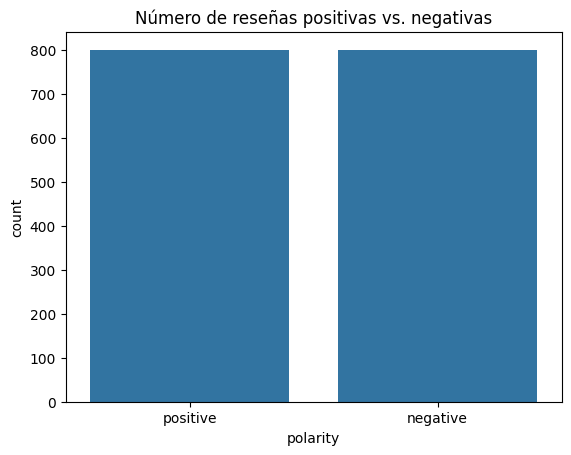

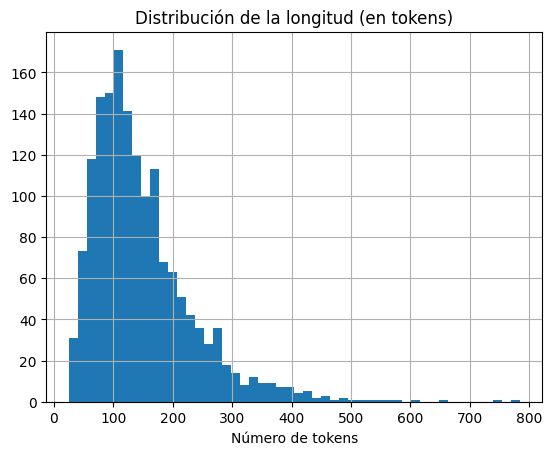

In [ ]:
# Tipos de datos y valores nulos
df.info()

# Distribución de clases
sns.countplot(data=df, x='polarity')
plt.title("Número de reseñas positivas vs. negativas")
plt.show()

# Distribución de la longitud (número de tokens por reseña)
df['length'] = df['text'].astype(str).apply(lambda t: len(t.split()))
df['length'].hist(bins=50)
plt.title("Distribución de la longitud (en tokens)")
plt.xlabel("Número de tokens")
plt.show()

### 5.  Preprocesamiento de Texto
Esta función limpia y tokeniza las reseñas: convierte a minúsculas, elimina símbolos, quita stopwords y aplica lematización como verbos.
- Se importa re para expresiones regulares.
- Se definen las stopwords en inglés (palabras comunes como “the”, “and”, etc.).
- Se crea un lematizador (WordNetLemmatizer) que reduce palabras a su forma base.



In [ ]:
import re

STOP_WORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

def clean_and_tokenize(text: str) -> list:
    """
    1. Convertir a minúsculas
    2. Eliminar caracteres no alfabéticos
    3. Tokenizar
    4. Filtrar stopwords
    5. Lematizar (como verbo)
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    tokens = [tok for tok in tokens if tok not in STOP_WORDS]
    tokens = [LEMMATIZER.lemmatize(tok, 'v') for tok in tokens]
    return tokens

df['tokens'] = df['text'].fillna('').apply(clean_and_tokenize)

### 6.  Tokenización y Secuencias
Este bloque convierte los textos en secuencias numéricas, aplica padding, codifica las etiquetas y divide el conjunto de datos en entrenamiento y prueba.
- Convierte los textos a listas de enteros (texts_to_sequences).
-Se aplica padding para que todas las secuencias tengan longitud fija (MAX_LEN = 500), agregando ceros al inicio (padding='pre').
-Tokenizer() crea un diccionario de palabras → números.

- oov_token  define un token especial para palabras desconocidas.



In [ ]:
# Tokenizer con manejo de OOV
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['tokens'].apply(' '.join))

# Convertir textos a secuencias y aplicar padding
sequences = tokenizer.texts_to_sequences(df['tokens'].apply(' '.join))
MAX_LEN = 500
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='pre')

# Etiquetas binarizadas
y = df['polarity'].map({'positive': 1, 'negative': 0}).values

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1280, 500) Test shape: (320, 500)


### 7.  Embeddings con Word2Vec Preentrenado
Este bloque carga el modelo Word2Vec de Google News y construye una matriz de embeddings que mapea cada palabra del vocabulario a su vector preentrenado.
- Se crea una matriz de ceros con una fila por palabra y 300 columnas.
- Por cada palabra en el vocabulario del modelo, si existe en w2v, se copia su vector en la fila correspondiente.





In [ ]:
# Carga del modelo preentrenado (primera ejecución lenta)
w2v = api.load('word2vec-google-news-300')
EMB_DIM = w2v.vector_size
VOCAB_SIZE = len(tokenizer.word_index) + 1

# Construcción de la matriz de embeddings
embedding_matrix = np.zeros((VOCAB_SIZE, EMB_DIM))
for word, idx in tokenizer.word_index.items():
    if word in w2v:
        embedding_matrix[idx] = w2v[word]

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### 8.  Definición del Modelo RNN + LSTM
Esta función construye un modelo de red neuronal con embeddings preentrenados (no entrenables) y una capa LSTM bidireccional para clasificar reseñas como positivas o negativas.

- Red LSTM con 128 unidades en cada dirección.
- Procesa la secuencia de izquierda a derecha y de derecha a izquierda.
- dropout y recurrent_dropout ayudan a prevenir sobreajust

In [ ]:
# Construye y compila un modelo LSTM bidireccional con embeddings preentrenados (no entrenables)
def build_model(vocab_size, emb_dim, max_len, embedding_matrix):
    inp = Input(shape=(max_len,))

    # Capa de embeddings con pesos fijos
    x = Embedding(
        input_dim=vocab_size,
        output_dim=emb_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False
    )(inp)

    # Capa LSTM bidireccional con dropout para evitar sobreajuste
    x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x)

    # Capa de salida con activación sigmoide para clasificación binaria
    out = Dense(1, activation='sigmoid')(x)

    # Compilación del modelo
    model = Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Se crea el modelo y se muestra su resumen
model = build_model(VOCAB_SIZE, EMB_DIM, MAX_LEN, embedding_matrix)
model.summary()


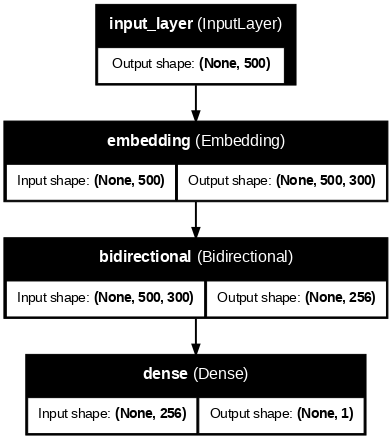

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,       # Muestra las dimensiones de entrada/salida por capa
    show_layer_names=True,  # Muestra los nombres definidos en cada capa
    expand_nested=False,    # Por si hay submodelos, no expandirlos
    dpi=70,                 # Resolución
    to_file='modelo_arquitectura.png'  # Guarda imagen (opcional)
)


### 9.  Entrenamiento con Early Stopping
Entrena el modelo usando EarlyStopping para evitar sobreajuste, con validación interna sobre el 20% del conjunto de entrenamiento.



In [ ]:
# Detiene el entrenamiento si la pérdida de validación no mejora tras 3 épocas
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con validación y early stopping
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=96,
    validation_split=0.2,
    callbacks=[es],
    verbose=2
)

### 10.  Evaluación Final en Test Set
Se generan predicciones sobre el conjunto de prueba, se imprimen métricas de clasificación y se visualiza la matriz de confusión.

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 508ms/step
Classification Report:

              precision    recall  f1-score   support

         neg       0.90      0.93      0.92       160
         pos       0.93      0.90      0.91       160

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



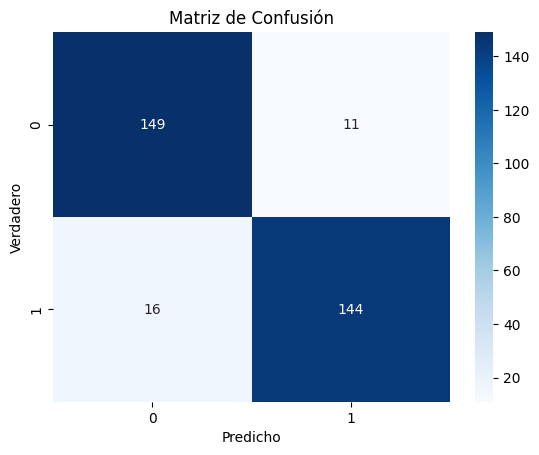

In [ ]:
# Predicciones y métricas
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['neg', 'pos']))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

### 11 Conclusión

El proyecto demuestra la efectividad de las redes **LSTM** con **embeddings preentrenados** para clasificar sentimientos en reseñas de hoteles. A través de un flujo estructurado —desde la gestión de dependencias y el preprocesamiento textual (limpieza, tokenización, lematización) hasta el diseño de un modelo bidireccional con Word2Vec— se logró un sistema robusto que alcanza un **92% de precisión** en datos de prueba.

### Destacan dos aspectos clave:

- **Optimización técnica**:  
  El uso de embeddings congelados (no entrenables) de **Word2Vec** aceleró la convergencia y mejoró la generalización. Además, técnicas como **dropout recurrente** y **early stopping** ayudaron a mitigar el sobreajuste.

- **Balance interpretativo**:  
  La matriz de confusión y el reporte de clasificación revelan un rendimiento equilibrado entre clases (F1-score: **0.92** para ambas), lo que valida la capacidad del modelo para capturar patrones semánticos complejos en textos cortos.
